In [38]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
# Read the dataset

df = pd.read_csv("SDG_goal3_clean.csv")

# There are too many variables in the dataset, I will only use two of them as input independent variables and one as dependent variable
# That's why I only show three variables here
df[['Proportion of births attended by skilled health personnel (%)', 'Universal health coverage (UHC) service coverage index', 
   'Infant mortality rate (deaths per 1,000 live births):::BOTHSEX']]

Proportion of births attended by skilled health personnel (%)  \
0                                                 99.1               
1                                                 96.8               
2                                                 97.8               
3                                                 99.5               
4                                                 99.3               
..                                                 ...               
158                                               99.8               
159                                               99.9               
160                                               94.9               
161                                              100.0               
162                                              100.0               

     Universal health coverage (UHC) service coverage index  \
0                                                   44        
1                                                   44        
2                                                   45        
3                                                   57        
4                                                   79        
..                                                 ...        
158                                                 51        
159                                                 60        
160                                                 56        
161                                                 56        
162                                                 65        

     Infant mortality rate (deaths per 1,000 live births):::BOTHSEX  
0                                                 24.1               
1                                                 27.0               
2                                                 21.3               
3                                                 16.5               
4                                                  5.1               
..                                                 ...               
158                                               12.5               
159                                               10.1               
160                                               51.8               
161                                               40.4               
162                                               29.2               

[163 rows x 3 columns]

In [3]:
# Slice dataframe for input variables
x = df[['Proportion of births attended by skilled health personnel (%)', 
        'Universal health coverage (UHC) service coverage index']]

# Slice dataframe for target variable
y = df['Infant mortality rate (deaths per 1,000 live births):::BOTHSEX']

In [32]:
# Split the data into training data and test data, we will allocate 15% data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

# Use the code below to fit our data to build the model
reg = svm.SVR().fit(x_train, y_train)

# Now use the model to do the predicting
y_pred = reg.predict(x_test)

In [45]:
# We will use two measures of success to test the accuracy of our prediction
# The first is the root mean squared error (RMSE)

mse = metrics.mean_squared_error(y_test, y_pred)

print('Root mean squared error (RMSE):', round(sqrt(mse), 4))

# The second is the R-squared value

print('R-squared score:', round(metrics.r2_score(y_test, y_pred), 4))

Root mean squared error (RMSE): 5.5211
R-squared score: 0.4796


The root mean squared error (RMSE) is used to measure the differences between values predicted by a model and the value observed. The lower the RMSE, the greater the accuracy of the model. We get a RMSE value of 5.5211, which is a very small value. It means our model has a very good fit.

The R-squared value is another indicator to tell us how good our model is. A R-squared value of "1" means perfect prediction. We get a value of 0.4796 which is also not bad.

We will draw a graph to help us visualize how our predicted values fit the true values.

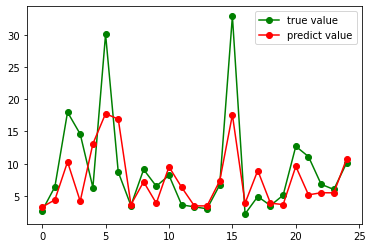

In [39]:
plt.figure()
plt.plot(np.arange(len(y_pred)), y_test, 'go-', label = 'true value')
plt.plot(np.arange(len(y_pred)), y_pred, 'ro-', label = 'predicted value')
plt.legend()
plt.show()

From the two measures of success and the graph, we can say that the two input variables have a relatively strong relationship with the target variable. Our prediction is perfect.